# Description et correspondance des caractéristiques des points SIFT

Dans le dernier chapitre, nous avons vu comment détecter les coins à l'aide des fonctions de détection des coins de Harris ou de Shi Tomasi. Nous avons également utilisé des descripteurs très simples pour faire correspondre les caractéristiques des coins de deux images différentes. 

Cependant, notre détecteur était assez médiocre puisqu'il échoue dès que l'image est légèrement mise à l'échelle, tournée ou transformée. Nous devons donc trouver un meilleur descripteur que le lot de pixels autour des coins. 

In [9]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


In [10]:
img1 = cv.imread('images/harris_1.jpg',cv.IMREAD_GRAYSCALE) # queryImage
img2 = cv.imread('images/harris_2.jpg',cv.IMREAD_GRAYSCALE) # trainImage


In [11]:
# Initiate SIFT detector
sift = cv.SIFT_create()

In [12]:
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [13]:
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50) # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

In [16]:
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
good=[]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
 if m.distance < 0.7*n.distance:
     matchesMask[i]=[1,0]
     good.append(m)

In [21]:
points1=np.array([kp1[m.trainIdx].pt for m in good])
points2=np.array([kp1[m.queryIdx].pt for m in good])

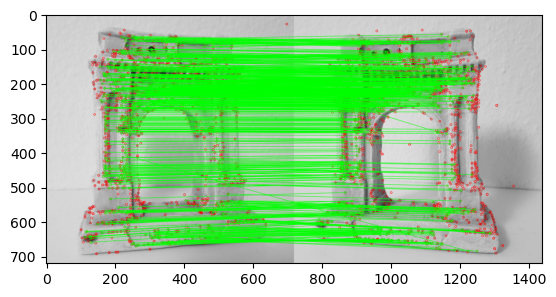

(<matplotlib.image.AxesImage at 0x163c790ad90>, None)

In [15]:
draw_params = dict(matchColor = (0,255,0),
 singlePointColor = (255,0,0),
 matchesMask = matchesMask,
 flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()